In [46]:
import requests
import urllib.request
from urllib.parse import quote
import numpy as np
from tqdm import tqdm
import contextlib
import json
import tqdm
from bs4 import BeautifulSoup as bs
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import collections
import pandas as pd

### Set up spotify scrapping functions

In [2]:
token = 'BQDmS84Cp2wqtfyx2yk4mdhjLm22v-koyiUxrRxTUSH4uBc48GVjH8WMPJfp-6Ix9DTHhNHqpk43rGKJ0OP8q78IFBXhjuE6YS7JfDSsXV1_YGdk2EwlCI9U6L6SB2NXUsAnH6vF5ByTbSdh3ICjagQhGfM'

header = {
    'Authorization': 'Bearer ' + token,
    'Accept': 'application/json',
    'Content-Type': 'application/json'
}

final_json = []

In [3]:
def song_features(song_id):
    query = 'audio-features/' + str(song_id)
    r = requests.request('get', 'https://api.spotify.com/v1/' + query, headers=header)
    return r.json()


def get_rateYourMusic_songs(genre, filenames, table_index=3) :
    
    #song year, artist and title
    searches = []
    all_info = []
    
    for f in filenames :

        res = bs(open(f),"html5lib")
        for t in res.findAll(attrs={'class': "mbgen"})[table_index].findAll("tr")[1:] :
                        
            if len(t.findAll("td")) >= 3 :
                
                
            
                year = t.findAll("td")[0].text
                artist = t.findAll("td")[1].text
                title = t.findAll("td")[2].text

                if '/' in title :
                    searches.append([year, artist, title.split('/')[0].strip()])
                    searches.append([year, artist, title.split('/')[1].strip()])

                else :
                    searches.append([year, artist, title])

    found = 0

    for s in tqdm.tqdm(searches) :
        result  = requests.request('get', 'https://api.spotify.com/v1/search?q='+ quote(s[2]) + "%20artist:" + quote(s[1]) + "&type=track", headers=header).json()
        time.sleep(0.2)
        items = result['tracks']['items']


        #We found the song
        if len(items) != 0 :

            found += 1

            song_id = result['tracks']['items'][0]['id']   
            song_release = items[0]['album']['release_date']
            features = song_features(song_id)

            year = s[0]
            cover = ""
            
            if len(items[0]['album']['images']) != 0 :                
                cover = items[0]['album']['images'][0]['url']            
            else :
                cover = "https://vignette.wikia.nocookie.net/uncyclopedia/images/a/a0/Questionmark.jpg/revision/latest?cb=20090616065802&format=original"
            
            artists = s[1]
            name = s[2]
            album = items[0]['album']['name']



            song_dict = {'year' : year,
                         'artists' : artists,
                         'name' : name,
                         'cover' : cover,
                         'album' : album,
                         'genre' : genre,
                        'danceability' : features['danceability'],
                        'energy' : features['energy'],
                        'key' : features['key'],
                        'loudness' : features['loudness'],
                        'mode' : features['mode'],
                        'speechiness' : features['speechiness'],
                        'acousticness' : features['acousticness'],
                        'instrumentalness' : features['instrumentalness'],
                        'liveness' : features['liveness'],
                        'valence' : features['liveness'],
                        'tempo' : features['tempo'],
                        'duration_ms' : features['duration_ms']}


            all_info.append(song_dict)
    print("found : ", found , ", (" + str(100*found/len(searches)) + "%) for genre " + genre)
    return all_info


# Download Contemporary RnB titles (94 songs)

From Itunes (70)

In [4]:
# get names from itunes
url = 'https://itunes.apple.com/search?term=song&genreId=1136&limit=200'

response = requests.get(url)
data = response.json()

found = 0

for e in tqdm.tqdm(data['results']):
    result  = requests.request('get', 'https://api.spotify.com/v1/search?q='+ quote(e['trackName']) + "%20artist:" + quote(e['artistName']) + "&type=track", headers=header).json()
    
    items = result['tracks']['items']
    
    
    #We found the song
    if len(items) != 0 :
        
        found += 1
    
        song_id = result['tracks']['items'][0]['id']    
        features = song_features(song_id)

        year = e['releaseDate'][:4]
        cover = e['artworkUrl100']
        artists = " and ".join([a['name'] for a in result['tracks']['items'][0]['artists']])
        print(artists)
        name = e['trackName']
        album = result['tracks']['items'][0]['album']['name']



        song_dict = {'year' : year,
                     'artists' : artists,
                     'name' : name,
                     'cover' : cover,
                     'album' : album,
                     'genre' : "contemporary-rnb",
                    'danceability' : features['danceability'],
                    'energy' : features['energy'],
                    'key' : features['key'],
                    'loudness' : features['loudness'],
                    'mode' : features['mode'],
                    'speechiness' : features['speechiness'],
                    'acousticness' : features['acousticness'],
                    'instrumentalness' : features['instrumentalness'],
                    'liveness' : features['liveness'],
                    'valence' : features['liveness'],
                    'tempo' : features['tempo'],
                    'duration_ms' : features['duration_ms']}


        final_json.append(song_dict)

  2%|▏         | 2/95 [00:00<00:17,  5.20it/s]

The O'Jays
Ashanti and French Montana


  3%|▎         | 3/95 [00:00<00:16,  5.46it/s]

Ashanti


  5%|▌         | 5/95 [00:00<00:16,  5.39it/s]

Ashanti
Ashanti


  7%|▋         | 7/95 [00:01<00:15,  5.53it/s]

Ashanti
Ashanti


  9%|▉         | 9/95 [00:01<00:14,  5.85it/s]

Ashanti
Ashanti


 11%|█         | 10/95 [00:01<00:14,  5.78it/s]

Ashanti


 13%|█▎        | 12/95 [00:02<00:15,  5.53it/s]

Ashanti and Beenie Man
Ashanti


 16%|█▌        | 15/95 [00:02<00:13,  5.76it/s]

Ashanti
Ashanti and Rick Ross


 18%|█▊        | 17/95 [00:03<00:13,  5.70it/s]

Ashanti and Jeremih
Shelea


 19%|█▉        | 18/95 [00:03<00:13,  5.50it/s]

Shelea


 21%|██        | 20/95 [00:03<00:15,  4.98it/s]

The O'Jays
Poppy Ajudha


 24%|██▍       | 23/95 [00:04<00:11,  6.02it/s]

Poppy Ajudha


 26%|██▋       | 25/95 [00:04<00:12,  5.71it/s]

Zorro Chang
Poppy Ajudha


 27%|██▋       | 26/95 [00:04<00:12,  5.68it/s]

Poppy Ajudha


 29%|██▉       | 28/95 [00:05<00:12,  5.26it/s]

Jaki Graham
Brian Jay and Linasia Monet


 32%|███▏      | 30/95 [00:05<00:11,  5.59it/s]

MAYLIN


 35%|███▍      | 33/95 [00:05<00:10,  5.76it/s]

Chris Read
Rodney Stepp


 39%|███▉      | 37/95 [00:06<00:09,  5.91it/s]

PM and Mia Song
Noidy


 40%|████      | 38/95 [00:06<00:09,  5.89it/s]

Gene Yus


 42%|████▏     | 40/95 [00:07<00:10,  5.42it/s]

The Doubt
The Doubt


 53%|█████▎    | 50/95 [00:08<00:06,  7.27it/s]

Shuga Blaz


 55%|█████▍    | 52/95 [00:08<00:07,  5.84it/s]

KayJay
Jaya


 57%|█████▋    | 54/95 [00:08<00:07,  5.69it/s]

DeJuan "N" Only
VI The Law


 59%|█████▉    | 56/95 [00:09<00:07,  4.90it/s]

Yohan Henry
Alexe Owbee


 61%|██████    | 58/95 [00:09<00:06,  5.86it/s]

Pash


 63%|██████▎   | 60/95 [00:10<00:05,  6.19it/s]

Naliz


 65%|██████▌   | 62/95 [00:10<00:04,  6.73it/s]

HasenPfote and Charity Projekt Kinder


 67%|██████▋   | 64/95 [00:10<00:05,  5.58it/s]

Chief Kooffreh
Hiprocktized


 69%|██████▉   | 66/95 [00:10<00:05,  5.80it/s]

Dave Beano
Diana Winter


 72%|███████▏  | 68/95 [00:11<00:04,  6.56it/s]

Peeda


 75%|███████▍  | 71/95 [00:11<00:03,  6.34it/s]

K-Luv
Tim Lee


 76%|███████▌  | 72/95 [00:11<00:03,  5.81it/s]

The Yellow Dust


 78%|███████▊  | 74/95 [00:12<00:03,  5.53it/s]

Chief Kooffreh
Ambra Noè


 81%|████████  | 77/95 [00:12<00:03,  5.43it/s]

Sharell Madden
Collin Sumner and Crisinothaproducer


 83%|████████▎ | 79/95 [00:13<00:02,  5.42it/s]

TSC
Paulina


 86%|████████▋ | 82/95 [00:13<00:02,  5.69it/s]

Chief Kooffreh


 88%|████████▊ | 84/95 [00:14<00:01,  5.83it/s]

The Yellow Dust


 91%|█████████ | 86/95 [00:14<00:01,  5.37it/s]

A to the B
Anjelcity2


 93%|█████████▎| 88/95 [00:14<00:01,  5.10it/s]

Shake
WTF Project


 95%|█████████▍| 90/95 [00:15<00:00,  5.15it/s]

Tsc Beatz
Victor Atenaga


 97%|█████████▋| 92/95 [00:15<00:00,  5.43it/s]

Wet Dreams & Dank Memes
Kawani Kuron


 98%|█████████▊| 93/95 [00:15<00:00,  5.31it/s]

Rodney Stepp


100%|██████████| 95/95 [00:16<00:00,  5.01it/s]

Soul Elements
Lorence Michaels


From rateYourMusic (24 songs)

In [5]:
final_json.extend(get_rateYourMusic_songs("contemporary-rnb", ["data/contemporary_rnb/cont_songs_1.html"], table_index=2))

100%|██████████| 40/40 [00:14<00:00,  2.65it/s]

found :  24 , (60.0%) for genre contemporary-rnb


# Download british RnB (527 songs)

In [6]:
final_json.extend(get_rateYourMusic_songs("british-rnb", ["data/british_rnb/brit_songs_" + str(c) + ".html" for c in range(1, 27) ]))

100%|██████████| 856/856 [05:21<00:00,  2.59it/s]

found :  527 , (61.56542056074766%) for genre british-rnb


# Download alternative RnB (198 songs)

In [7]:
final_json.extend(get_rateYourMusic_songs("alternative-rnb", ["data/alternative_rnb/alt_songs_" + str(c) + ".html" for c in range(1, 12) ]))

100%|██████████| 278/278 [01:42<00:00,  2.78it/s]

found :  198 , (71.22302158273381%) for genre alternative-rnb


# Download new jack swing RnB (197 songs)

In [8]:
final_json.extend(get_rateYourMusic_songs("new-jack-swing-rnb", ["data/new_jack_swing_rnb/njs_rnb_" + str(c) + ".html" for c in range(1, 12) ]))

100%|██████████| 300/300 [01:52<00:00,  2.89it/s]

found :  198 , (66.0%) for genre new-jack-swing-rnb


# Download new Orleans RnB (253 songs)

In [9]:
final_json.extend(get_rateYourMusic_songs("new-orleans-rnb", ["data/new_orleans_rnb/new_orleans_rnb" + str(c) + ".html" for c in range(1, 12) ]))

100%|██████████| 394/394 [02:38<00:00,  2.91it/s]

found :  253 , (64.21319796954315%) for genre new-orleans-rnb


# Download Jump Blues (261 songs)

In [10]:
final_json.extend(get_rateYourMusic_songs("jump-blues", ["data/jump_blues_rnb/jump_blues_" + str(c) + ".html" for c in range(1, 12) ]))

100%|██████████| 414/414 [02:40<00:00,  2.89it/s]

found :  261 , (63.04347826086956%) for genre jump-blues


# Download blue-eyed soul (275 songs)

In [11]:
final_json.extend(get_rateYourMusic_songs("blue-eyed-soul", ["data/blue_eyed_soul/blue_eyed_soul_" + str(c) + ".html" for c in range(1, 12) ]))

100%|██████████| 386/386 [02:29<00:00,  2.48it/s]

found :  275 , (71.24352331606218%) for genre blue-eyed-soul


In [12]:
#Dump everything into the data
json.dump(final_json, open("rnb_data.json", 'w'))

# visualize number of songs per year

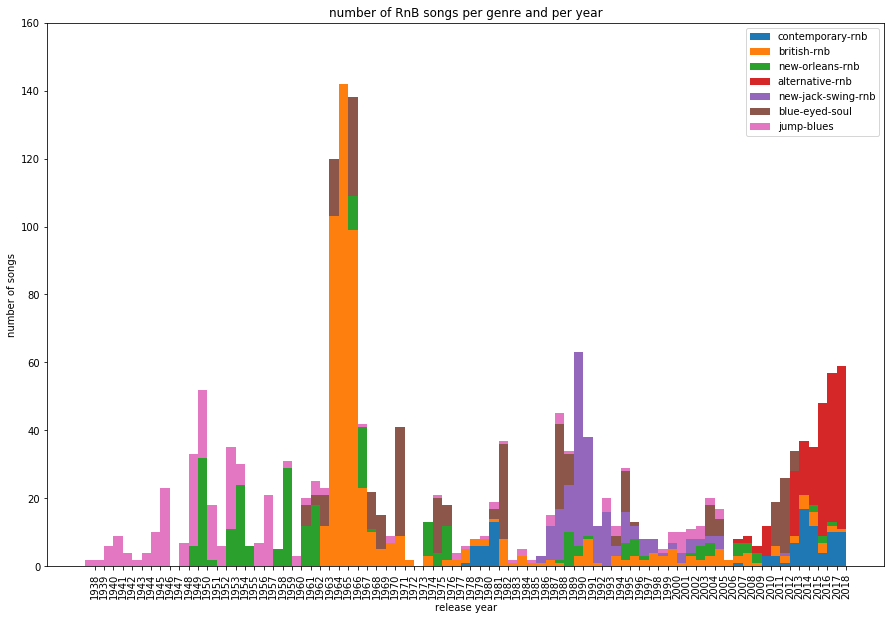

In [77]:
import collections

#all possible genres
genres = ['contemporary-rnb', 'british-rnb', 'new-orleans-rnb', 
          'alternative-rnb', 'new-jack-swing-rnb', 'blue-eyed-soul', 'jump-blues']

#compute earliest and latest year globally
all_years = [d['year'] for d in final_json if (d['year'] != '')]
min_all_years, max_all_years = int(min(all_years)), int(max(all_years)) + 1

#plot settings
width = 1
figure(figsize=(15,10))
plots = []

#initialize all years to zero
seen_years = collections.Counter()
for y in range(min_all_years, max_all_years) :
        seen_years[str(y)] = 0



for g in genres :

    #years of genre songs
    genre_years = [d['year'] for d in final_json if ((d["genre"] == g) and (d['year'] != ''))]
    
    #create counter
    years_per_genre = collections.Counter()
    
    
    #put 0 as default value for all years
    for y in range(min_all_years, max_all_years) :
        years_per_genre[str(y)] = 0
        
    #count values
    years_per_genre.update(genre_years)
    
    #create plot variables
    labels, values = zip(*years_per_genre.items())
    labels_all, values_all = zip(*seen_years.items())
    indexes = np.arange(len(labels))    
    
    #plot with bottom
    p = plt.bar(indexes, values, width, bottom=values_all)    
    plots.append(p)
    
    #update seen years counter
    seen_years.update(genre_years)

#settings for axes
plt.xticks(indexes + width * 0.5, labels, rotation=90)
plt.xlabel("release year")
plt.ylabel("number of songs")
plt.ylim(ymax = 160, ymin = 0)

#general plot settings
plt.title("number of RnB songs per genre and per year")
plt.legend(plots, genres)

# plot
plt.savefig("nb_of_songs.png")
plt.show()


# compute discriminative coefficients for each feature and each year 